In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv("/home/sid/Downloads/iris-species/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Column Id is of no use.
data=data.iloc[:,1:]

In [5]:
print data.shape

(150, 5)


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
data["Species"]=le.fit_transform(data["Species"])

In [9]:
from sklearn import svm

In [10]:
model=svm.SVC(kernel='linear',C=1e5)

In [11]:
X=[x for x in data.columns if x not in ["Species"]]

In [12]:
model.fit(data[X],data["Species"])

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(data["Species"],model.predict(data[X]))

In [14]:
print accuracy

0.9866666666666667


In [15]:
## SVM has a 100% accurcay ; hence could be possible that the model is overfitting or may be data is too simple.

In [16]:
## Plotting Decision Boundaries for different kinds of svm

In [17]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [18]:
## Using the features Petal Length and Petal Width for plotting.

In [19]:
X1=[x for x in data.columns if x in ["PetalLengthCm","PetalWidthCm"]]
X11=data[X1]


In [20]:
Y=data.Species

In [21]:
models= (svm.SVC(kernel='linear', C=1e5),
         svm.LinearSVC(C=1e5), 
         svm.SVC(kernel='rbf', gamma=0.7, C=1e5),
         svm.SVC(kernel='poly', degree=3, C=1e5))
## gamma is inverse of std deviation n used as a similarity measure between two points.

In [22]:
models = (clf.fit(data[X1], Y) for clf in models)

In [23]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


In [24]:
def create_meshgrid(x,y,h=.02):
    x_min, x_max = x.min() - 2, x.max() + 2
    y_min, y_max = y.min() - 2, y.max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx,yy

In [25]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

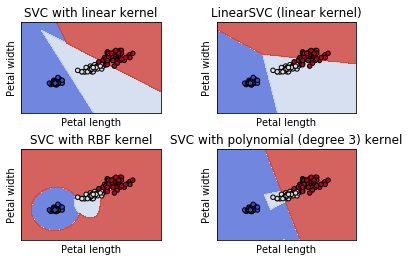

In [26]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0 = data["PetalLengthCm"]
x1 = data["PetalWidthCm"]
xx, yy = create_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

In [27]:
## On using Sepal Length and Sepal Width

In [28]:
X2=[x for x in data.columns if x in ["SepalLengthCm","SepalWidthCm"]]

In [29]:
models2= (svm.SVC(kernel='linear', C=1e5),
         svm.LinearSVC(C=1e5), 
         svm.SVC(kernel='rbf', gamma=0.7, C=1e5),
         svm.SVC(kernel='poly', degree=3, C=1e5))

In [30]:
models2 = (clf.fit(data[X1], Y) for clf in models2)

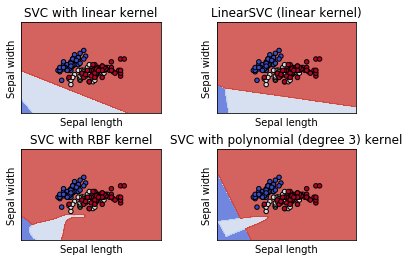

In [31]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0 = data["SepalLengthCm"]
x1 = data["SepalWidthCm"]
xx, yy = create_meshgrid(x0, x1)

for clf, title, ax in zip(models2, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()